In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)


In [2]:
df = pd.read_csv(r"C:\fili\jupyter_proyectos\diabetes.csv")

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()
df.describe()
df['Outcome'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
# Suponiendo que la columna objetivo se llama 'Outcome'
target_col = 'Outcome'

X = df.drop(columns=[target_col])
y = df[target_col]

X.head(), y.head()



(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  
 0                     0.627   50  
 1                     0.351   31  
 2                     0.672   32  
 3                     0.167   21  
 4                     2.288   33  ,
 0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape



((614, 8), (154, 8))

In [6]:
def evaluar_modelo_clasificacion(y_true, y_pred, titulo=""):
    print(f"=== {titulo} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred))


In [7]:
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

y_train_pred_base = dt_base.predict(X_train)
y_test_pred_base = dt_base.predict(X_test)

evaluar_modelo_clasificacion(y_train, y_train_pred_base, "Entrenamiento (modelo base)")
evaluar_modelo_clasificacion(y_test, y_test_pred_base, "Prueba (modelo base)")


=== Entrenamiento (modelo base) ===
Accuracy: 1.0

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

=== Prueba (modelo base) ===
Accuracy: 0.7272727272727273

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



In [8]:
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

y_train_pred_base = dt_base.predict(X_train)
y_test_pred_base = dt_base.predict(X_test)

evaluar_modelo_clasificacion(y_train, y_train_pred_base, "Entrenamiento (modelo base)")
evaluar_modelo_clasificacion(y_test, y_test_pred_base, "Prueba (modelo base)")


=== Entrenamiento (modelo base) ===
Accuracy: 1.0

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

=== Prueba (modelo base) ===
Accuracy: 0.7272727272727273

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



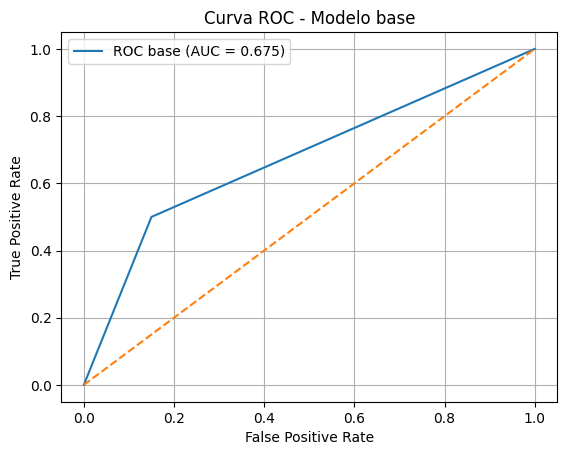

In [9]:
# Para curva ROC se necesitan probabilidades
y_test_proba_base = dt_base.predict_proba(X_test)[:, 1]

fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_test_proba_base)
auc_base = auc(fpr_base, tpr_base)

plt.figure()
plt.plot(fpr_base, tpr_base, label=f"ROC base (AUC = {auc_base:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo base")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
param_grid = {
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "criterion": ["gini", "entropy"]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

grid_search.best_params_


Fitting 5 folds for each of 160 candidates, totalling 800 fits


{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [11]:
best_dt = grid_search.best_estimator_

y_train_pred_best = best_dt.predict(X_train)
y_test_pred_best = best_dt.predict(X_test)

evaluar_modelo_clasificacion(y_train, y_train_pred_best, "Entrenamiento (mejor modelo)")
evaluar_modelo_clasificacion(y_test, y_test_pred_best, "Prueba (mejor modelo)")


=== Entrenamiento (mejor modelo) ===
Accuracy: 0.760586319218241

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       400
           1       0.84      0.39      0.53       214

    accuracy                           0.76       614
   macro avg       0.79      0.67      0.68       614
weighted avg       0.78      0.76      0.73       614

=== Prueba (mejor modelo) ===
Accuracy: 0.6948051948051948

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       100
           1       0.65      0.28      0.39        54

    accuracy                           0.69       154
   macro avg       0.68      0.60      0.59       154
weighted avg       0.68      0.69      0.65       154



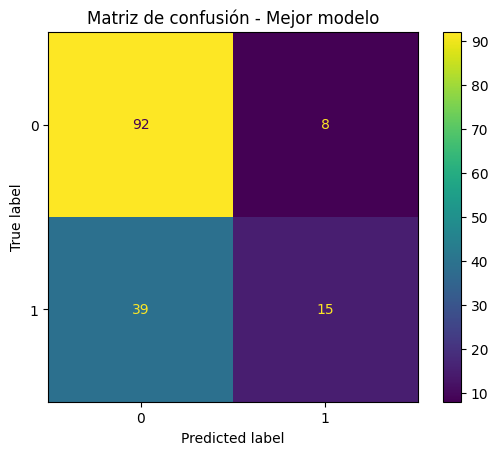

In [12]:
cm_best = confusion_matrix(y_test, y_test_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot()
plt.title("Matriz de confusión - Mejor modelo")
plt.show()


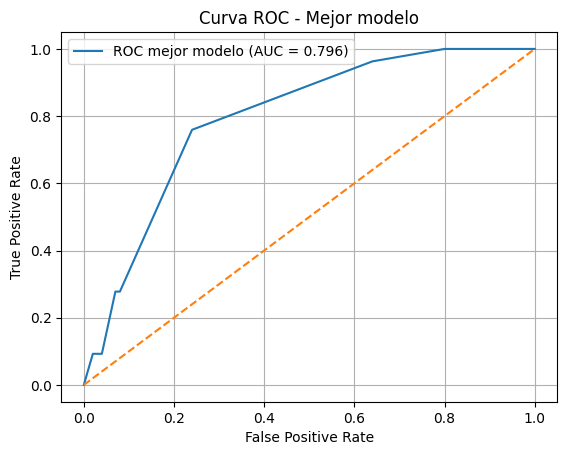

In [13]:
y_test_proba_best = best_dt.predict_proba(X_test)[:, 1]

fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_test_proba_best)
auc_best = auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, label=f"ROC mejor modelo (AUC = {auc_best:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Mejor modelo")
plt.legend()
plt.grid(True)
plt.show()


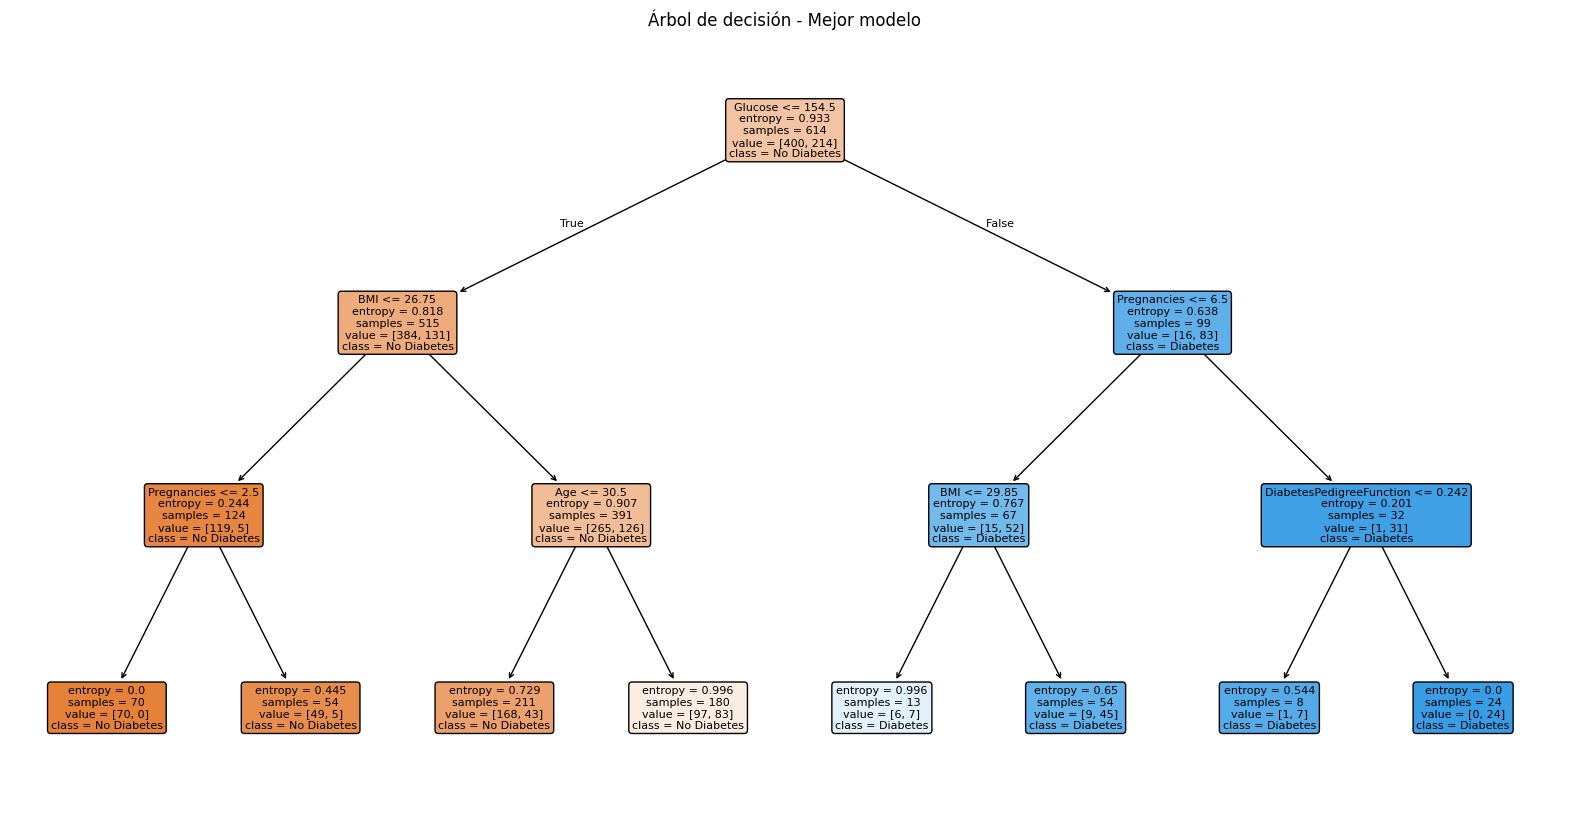

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árbol de decisión - Mejor modelo")
plt.show()


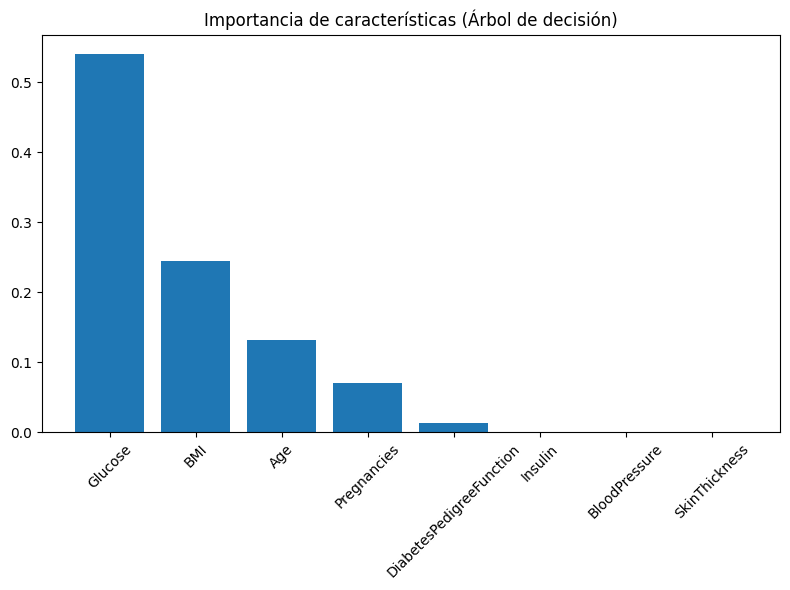

In [15]:
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation=45)
plt.title("Importancia de características (Árbol de decisión)")
plt.tight_layout()
plt.show()


In [16]:
import joblib

# Guardar el modelo optimizado de árbol de decisión
joblib.dump(best_dt, "modelo_arbol_decision_diabetes.pkl")

print("Modelo guardado como 'modelo_arbol_decision_diabetes.pkl'")


Modelo guardado como 'modelo_arbol_decision_diabetes.pkl'
